An Allen-Cahn playground
========================

A first SDC run
---------------

We will start by setting up our spatial problem:

In [1]:
from pySDC.implementations.problem_classes.AllenCahn_2D_FD import allencahn_fullyimplicit

# initialize problem parameters

problem_params = dict()
problem_params['nu'] = 2
problem_params['eps'] = 0.04
problem_params['radius'] = 0.25
problem_params['nvars'] = [(128, 128)]
problem_params['newton_maxiter'] = 100
problem_params['newton_tol'] = 1E-08
problem_params['lin_tol'] = 1E-09
problem_params['lin_maxiter'] = 100

Then, the temporal setup for pySDC:

In [2]:
from pySDC.implementations.sweeper_classes.generic_implicit import generic_implicit

# initialize level parameters
level_params = dict()
level_params['restol'] = 1E-07
level_params['dt'] = 1E-03 / 2
level_params['nsweeps'] = 1

# initialize sweeper parameters
sweeper_params = dict()
sweeper_params['quad_type'] = 'RADAU-RIGHT'
sweeper_params['QI'] = ['LU']
sweeper_params['num_nodes'] = 4
sweeper_params['initial_guess'] = 'zero'

# initialize step parameters
step_params = dict()
step_params['maxiter'] = 50

# setup parameters "in time"
t0 = 0
Tend = 0.016

Finally, the controller:

In [3]:
from pySDC.implementations.controller_classes.controller_nonMPI import controller_nonMPI

# initialize controller parameters
controller_params = dict()
controller_params['logger_level'] = 20

# fill description dictionary for easy step instantiation
description = dict()
description['problem_class'] = allencahn_fullyimplicit
description['problem_params'] = problem_params  # pass problem parameters
description['sweeper_class'] = generic_implicit  # pass sweeper
description['sweeper_params'] = sweeper_params  # pass sweeper parameters
description['level_params'] = level_params  # pass level parameters
description['step_params'] = step_params  # pass step parameters

# instantiate controller

controller = controller_nonMPI(num_procs=1, controller_params=controller_params, description=description)

controller - INFO: Welcome to the one and only, really very astonishing and 87.3% bug free
                                 _____ _____   _____ 
                                / ____|  __ \ / ____|
                    _ __  _   _| (___ | |  | | |     
                   | '_ \| | | |\___ \| |  | | |     
                   | |_) | |_| |____) | |__| | |____ 
                   | .__/ \__, |_____/|_____/ \_____|
                   | |     __/ |                     
                   |_|    |___/                      
                                                     
controller - INFO: Setup overview (--> user-defined, -> dependency) -- BEGIN
controller - INFO: ----------------------------------------------------------------------------------------------------

Controller: <class 'pySDC.implementations.controller_classes.controller_nonMPI.controller_nonMPI'>
    mssdc_jac = True
    predict_type = None
    all_to_done = False
--> logger_level = 20
    log_to_file = False
    dump_se

We're now setting up the initial conditions. Note that we could have done this earlier, but now the data structure is in place and we can rely on our problem class without having to deal with it directly:

In [4]:
# get initial values on finest level
P = controller.MS[0].levels[0].prob
uinit = P.u_exact(t0)

Now everything is in place to run the simulation:

In [5]:
# call main function to get things done...
uend, stats = controller.run(u0=uinit, t0=t0, Tend=Tend)

hooks - INFO: Process  0 on time 0.000000 at stage         IT_FINE: Level: 0 -- Iteration:  1 -- Sweep:  1 -- residual: 8.83633397e-03
hooks - INFO: Process  0 on time 0.000000 at stage         IT_FINE: Level: 0 -- Iteration:  2 -- Sweep:  1 -- residual: 1.61011700e-05
hooks - INFO: Process  0 on time 0.000000 at stage         IT_FINE: Level: 0 -- Iteration:  3 -- Sweep:  1 -- residual: 1.84328884e-06
hooks - INFO: Process  0 on time 0.000000 at stage         IT_FINE: Level: 0 -- Iteration:  4 -- Sweep:  1 -- residual: 2.20525763e-07
hooks - INFO: Process  0 on time 0.000000 at stage         IT_FINE: Level: 0 -- Iteration:  5 -- Sweep:  1 -- residual: 3.44135767e-08
hooks - INFO: Process  0 on time 0.000500 at stage         IT_FINE: Level: 0 -- Iteration:  1 -- Sweep:  1 -- residual: 8.90892942e-03
hooks - INFO: Process  0 on time 0.000500 at stage         IT_FINE: Level: 0 -- Iteration:  2 -- Sweep:  1 -- residual: 2.36963780e-05
hooks - INFO: Process  0 on time 0.000500 at stage     

hooks - INFO: Process  0 on time 0.006000 at stage         IT_FINE: Level: 0 -- Iteration:  2 -- Sweep:  1 -- residual: 5.89563470e-05
hooks - INFO: Process  0 on time 0.006000 at stage         IT_FINE: Level: 0 -- Iteration:  3 -- Sweep:  1 -- residual: 3.64219988e-06
hooks - INFO: Process  0 on time 0.006000 at stage         IT_FINE: Level: 0 -- Iteration:  4 -- Sweep:  1 -- residual: 3.31043271e-07
hooks - INFO: Process  0 on time 0.006000 at stage         IT_FINE: Level: 0 -- Iteration:  5 -- Sweep:  1 -- residual: 3.66295971e-08
hooks - INFO: Process  0 on time 0.006500 at stage         IT_FINE: Level: 0 -- Iteration:  1 -- Sweep:  1 -- residual: 9.93648317e-03
hooks - INFO: Process  0 on time 0.006500 at stage         IT_FINE: Level: 0 -- Iteration:  2 -- Sweep:  1 -- residual: 6.04568634e-05
hooks - INFO: Process  0 on time 0.006500 at stage         IT_FINE: Level: 0 -- Iteration:  3 -- Sweep:  1 -- residual: 3.72352553e-06
hooks - INFO: Process  0 on time 0.006500 at stage     

hooks - INFO: Process  0 on time 0.012000 at stage         IT_FINE: Level: 0 -- Iteration:  3 -- Sweep:  1 -- residual: 4.84163310e-06
hooks - INFO: Process  0 on time 0.012000 at stage         IT_FINE: Level: 0 -- Iteration:  4 -- Sweep:  1 -- residual: 4.38721624e-07
hooks - INFO: Process  0 on time 0.012000 at stage         IT_FINE: Level: 0 -- Iteration:  5 -- Sweep:  1 -- residual: 4.84445281e-08
hooks - INFO: Process  0 on time 0.012500 at stage         IT_FINE: Level: 0 -- Iteration:  1 -- Sweep:  1 -- residual: 1.15165044e-02
hooks - INFO: Process  0 on time 0.012500 at stage         IT_FINE: Level: 0 -- Iteration:  2 -- Sweep:  1 -- residual: 8.51941819e-05
hooks - INFO: Process  0 on time 0.012500 at stage         IT_FINE: Level: 0 -- Iteration:  3 -- Sweep:  1 -- residual: 4.98029044e-06
hooks - INFO: Process  0 on time 0.012500 at stage         IT_FINE: Level: 0 -- Iteration:  4 -- Sweep:  1 -- residual: 4.50955563e-07
hooks - INFO: Process  0 on time 0.012500 at stage     

What did it do? Let's have a look at the solution ``uend`` and compare it to the initial condition ``uinit`` to see if things moved:

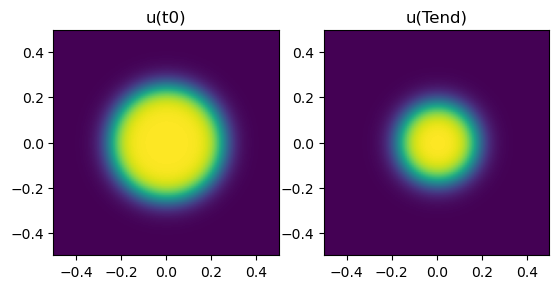

In [6]:
import matplotlib.pylab as plt

plt.subplot(1, 2, 1)
plt.title("u(t0)")
plt.imshow(uinit,extent=[-0.5,0.5,-0.5,0.5])

plt.subplot(1, 2, 2)
plt.title("u(Tend)")
plt.imshow(uend,extent=[-0.5,0.5,-0.5,0.5])

Now let's have a look at the iteration counts. For that the ``run`` method also returned a ``stats`` object. It is not really straightforward to extract information from that (unless you happen to know how), but there are helpers around:


In [7]:
from pySDC.helpers.stats_helper import get_sorted
import numpy as np

# convert filtered statistics to list of iterations count, sorted by time-step
iter_counts = get_sorted(stats, type='niter', sortby='time')

# compute and print statistics
niters = np.array([item[1] for item in iter_counts])

In [8]:
print(f'Mean number of iterations: {np.mean(niters):4.2f}')
print(f'Range of values for number of iterations: {np.ptp(niters)}')
print(f'Position of max/min number of iterations: {int(np.argmax(niters))} / {int(np.argmax(niters))}')
print(f'Iteration count nonlinear solver (sum/mean per call): {P.newton_itercount} / {P.newton_itercount / max(P.newton_ncalls, 1)}')

Mean number of iterations: 5.00
Range of values for number of iterations: 0
Position of max/min number of iterations: 0 / 0
Iteration count nonlinear solver (sum/mean per call): 1057 / 1.6515625


We also get the time-to-solution back:

In [9]:
timing = get_sorted(stats, type='timing_run', sortby='time')

print('Time to solution: %6.4f sec.' % timing[0][1])

Time to solution: 8.8479 sec.


More user output - using hooks
------------------------------

The default output can be controlled using the ``logger_level`` in the ``controller_params``: ``30`` is silent, ``20`` gives runtime information and ``10`` is for debugging. Note that when changing any of these parameters, it is required to set up the controller again, because only then the parameters will be correctly applied everywhere. We will do that later.

In [10]:
controller_params['logger_level'] = 30

Without further specification, `pySDC` gathers information on iterations, residuals, runtimes and so on. In order to get problem-specific, custom data in there, hook-classes can be added to the controller, which contain functions that are then called whenever certain parts of the algorithm are started or completed. A list of possible functions can be found in ``core/Hooks.py``, which is the class all custom hook-classes should inherit from. We show here an example, where after each step the current radius is calculated:

In [11]:
from pySDC.core.Hooks import hooks

class monitor(hooks):

    def post_step(self, step, level_number):

        super(monitor, self).post_step(step, level_number)

        # get current
        L = step.levels[0]

        c = np.count_nonzero(L.uend >= 0.0)
        radius = np.sqrt(c / np.pi) * L.prob.dx

        self.add_to_stats(process=step.status.slot, time=L.time + L.dt, level=-1, iter=step.status.iter,
                          sweep=L.status.sweep, type='computed_radius', value=radius)

Besides some computation, the key functionality is the call to ``self.add_to_stats`` which is the function to add information to the ``stats``-object. Using ``type``, this can later be accessed as we have seen above with ``timing_run`` and ``niter``. The name ``post_step`` of the class function indicates that this will be called after each time-step is completed.

This class can now be added to the controller:

In [12]:
controller_params['hook_class'] = monitor
controller = controller_nonMPI(num_procs=1, controller_params=controller_params, description=description)

We now re-run the simulation, obtain the radius after each step and plot it:

In [13]:
uend, stats = controller.run(u0=uinit, t0=t0, Tend=Tend)

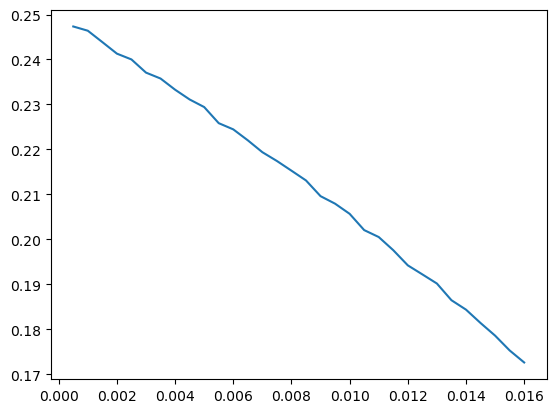

In [14]:
radii = get_sorted(stats, type='computed_radius', sortby='time')

plt.subplot()
plt.plot([t[0] for t in radii], [t[1] for t in radii])

Building your own sweeper
-------------------------

While pySDC comes with a lot of functionality, it's purpose is to be extendable and (in a sense) modular. User are able to replace nearly all key functionality with their own approaches. One particular aspect of this are custom sweepers. In this example, we will look at sweepers that enable parallelism across the nodes.

A sweeper in pySDC takes values $u_m$ at the nodes and updates them using the SDC iteration rule to get $u_{m+1}$, using the particular type of $Q_\Delta$ (and of course the scheme itself, be it IMEX, implicit, verlocity-verlet and so on). The sweeper is also responsible for computing the residual on a time-step, for getting the final value $u_{\textrm{end}}$ and the right boundary of the intervall. It also provides the mechanism to integrate over the nodes using the $Q$-matrix and it can set initial guess for each node.

All of these things can be overwritten from users, if needed. For replacing a serial sweeper with a parallel one, this is indeed needed. The idea is that if $Q_\Delta$ is a diagonal one, each update of the $M$ nodes can be done using $M$ processes. For computing the residual or for integrating over the nodes, communication over the nodes is needed. We will thus write a new sweeper, which can work with $M$ MPI processes. Note that we will not deal with all the details here, no error checking, no ideal memory layout etc. to keep the example short.

Before we start, however, let's make sure MPI jobs can be run. We connect to our ``ipcluster`` and check if all looks good:

In [15]:
import ipyparallel as ipp
rc = ipp.Client()
view = rc[:]

In [16]:
%%px
from mpi4py import MPI

print(MPI.COMM_WORLD.Get_size())

[stdout:0] 4


[stdout:3] 4


[stdout:1] 4


[stdout:2] 4


We then start with the initialization of our new sweeper, nothing fancy here:

In [17]:
%%px
import jdc  # required to split the class definition into multiple cells..
from pySDC.core.Sweeper import sweeper

class generic_implicit_MPI(sweeper):

    def __init__(self, params):

        # call parent's initialization routine
        super(generic_implicit_MPI, self).__init__(params)
        # set Q_Delta matrix and store MPI rank
        self.QI = self.get_Qdelta_implicit(self.coll, qd_type=self.params.QI)
        self.rank = self.params.comm.Get_rank()

The next thing our sweeper should be able to do is to integrate over the nodes using $Q$. As in the serial case this is just evaluating $Qu$, but now each process has only a single entry of $u$ (i.e. process $m$ has $u_m$). That's a standard use case for ``MPI Reduce``, but each process has to participate in $M$ of those reductions to get all availabe data. Note that there's an easier way to do that if you accept to store not 1 but all $M$ values.

In [18]:
%%px
%%add_to generic_implicit_MPI
def integrate(self):
    # get current level and problem description
    L = self.level
    P = L.prob

    me = P.dtype_u(P.init, val=0.0)
    for m in range(self.coll.num_nodes):
        if m == self.rank:
            # if it's my turn, add to result the incoming data
            self.params.comm.Reduce(L.dt * self.coll.Qmat[m + 1, self.rank + 1] * L.f[self.rank + 1],
                                    me, root=m, op=MPI.SUM)
        else:
            # if it's not my turn, contribute to global sum
            self.params.comm.Reduce(L.dt * self.coll.Qmat[m + 1, self.rank + 1] * L.f[self.rank + 1],
                                    None, root=m, op=MPI.SUM)
    return me

We end up with the $m$th part of the integral over nodes on process $m$. The next step now is to add the actual sweep mechanics. This is actually very simple: build the right-hand side of SDC and apply the preconditioner. Since $Q_\Delta$ is diagonal and the nodes are distributed, there is no loop involved (which indicates that we're going to get speeeeeeeedup).

In [19]:
%%px
%%add_to generic_implicit_MPI
def update_nodes(self):
    # get current level and problem description
    L = self.level
    P = L.prob

     # start building the right-hand side of for the SDC sweep
    # get Q F(u^k)
    rhs = self.integrate()
    # substract Q_Delta F(u^k)
    rhs -= L.dt * self.QI[self.rank + 1, self.rank + 1] * L.f[self.rank + 1]
    # add initial value
    rhs += L.u[0]

    # implicit solve with prefactor stemming from the diagonal of Qd
    L.u[self.rank + 1] = P.solve_system(rhs, L.dt * self.QI[self.rank + 1, self.rank + 1], L.u[self.rank + 1],
                                        L.time + L.dt * self.coll.nodes[self.rank])
    # update function values
    L.f[self.rank + 1] = P.eval_f(L.u[self.rank + 1], L.time + L.dt * self.coll.nodes[self.rank])

    # indicate presence of new values at this level (pySDC internal thing, should always do this in your sweeper)
    L.status.updated = True

Now that there's a way how to get from $u^k$ to $u^{k+1}$, we need to do some bookkeeping: compute the residual, compute the end point, define initial guesses. Nothing fancy here, but necessary nonetheless:

In [25]:
%%px
%%add_to generic_implicit_MPI
def compute_end_point(self):
    # get current level and problem description
    L = self.level
    L.uend[:] = self.params.comm.bcast(L.u[self.rank + 1], root=self.params.comm.Get_size() - 1)

def compute_residual(self, stage=None):
    # get current level and problem description
    L = self.level

    # compute the residual for each node
    res = self.integrate()
    res += L.u[0] - L.u[self.rank + 1]
    # use abs function from data type here
    res_norm = abs(res)
    # find maximal residual over the nodes
    L.status.residual = self.params.comm.allreduce(res_norm, op=MPI.MAX)

    # indicate that the residual has seen the new values
    L.status.updated = False

def predict(self):
    # get current level and problem description
    L = self.level
    P = L.prob

    # evaluate RHS at left point
    L.f[0] = P.eval_f(L.u[0], L.time)
    # we just implement 'spread' here for simplicity
    L.u[self.rank + 1] = P.dtype_u(L.u[0])
    L.f[self.rank + 1] = P.eval_f(L.u[self.rank + 1], L.time + L.dt * self.coll.nodes[self.rank])

    L.uend = P.dtype_u(L.u[0])

    # indicate that this level is now ready for sweeps
    L.status.unlocked = True
    L.status.updated = True

Now we have a full new sweeper which allows us to run in parallel over $M$ nodes (since we did not spend much thought on this, note that it HAS to be exactly $M$ processes.. much room for optimization here!). In order to use all this, we have to pass the new sweeper to the controller and include the MPI communicator as parameter for the sweeper.

Now, due to limitations of how to run MPI stuff in Jupyter notebooks, we have to set up our whole run again. Re-using data from above won't work because we need to change context with the cell magic ``%%px``.

In [26]:
%%px
from pySDC.implementations.problem_classes.AllenCahn_2D_FD import allencahn_fullyimplicit

# initialize problem parameters
problem_params = dict()
problem_params['nu'] = 2
problem_params['eps'] = 0.04
problem_params['radius'] = 0.25
problem_params['nvars'] = [(128, 128)]
problem_params['newton_maxiter'] = 100
problem_params['newton_tol'] = 1E-08
problem_params['lin_tol'] = 1E-09
problem_params['lin_maxiter'] = 100

# initialize level parameters
level_params = dict()
level_params['restol'] = 1E-07
level_params['dt'] = 1E-03 / 2
level_params['nsweeps'] = 1

# initialize sweeper parameters
sweeper_params = dict()
sweeper_params['quad_type'] = 'RADAU-RIGHT'
sweeper_params['num_nodes'] = 4
sweeper_params['initial_guess'] = 'zero'

# initialize step parameters
step_params = dict()
step_params['maxiter'] = 50

# setup parameters "in time"
t0 = 0
Tend = 0.016

# initialize controller parameters
controller_params = dict()
controller_params['logger_level'] = 30

# fill description dictionary for easy step instantiation
description = dict()
description['problem_class'] = allencahn_fullyimplicit
description['problem_params'] = problem_params  # pass problem parameters
description['level_params'] = level_params  # pass level parameters
description['step_params'] = step_params  # pass step parameters


Now we need to put in our new sweeper. Note that we also have to choose a different $Q_\Delta$. We'll use a pre-defined one from the base sweeper class, pass the MPI communicator to the sweeper and put all this into the description of the problem to finally instantiate our controller:

In [27]:
%%px
from pySDC.implementations.controller_classes.controller_nonMPI import controller_nonMPI

sweeper_params['QI'] = ['MIN3']
sweeper_params['comm'] = MPI.COMM_WORLD

description['sweeper_class'] = generic_implicit_MPI  # pass sweeper class
description['sweeper_params'] = sweeper_params  # pass sweeper parameters

controller = controller_nonMPI(num_procs=1, controller_params=controller_params, description=description)

Looks good so far, so we'll set up the initial conditions and run this:

In [28]:
%%px
P = controller.MS[0].levels[0].prob
uinit = P.u_exact(t0)

uend_par, stats_par = controller.run(u0=uinit, t0=t0, Tend=Tend)

%px:   0%|          | 0/4 [00:00<?, ?tasks/s]

OK, no message so far (which is good, logger level is set to silent). All participating processes now have the results and stats, so let's see:

In [29]:
%%px
rank = MPI.COMM_WORLD.Get_rank()

from pySDC.helpers.stats_helper import get_sorted

timing = get_sorted(stats_par, type='timing_run', sortby='time')
print(f'Time to solution on rank {rank}: {timing[0][1]:6.4f} sec.' )

if rank == 0:
    import matplotlib.pylab as plt

    plt.subplot(1, 2, 1)
    plt.title("u(t0)")
    plt.imshow(uinit,extent=[-0.5,0.5,-0.5,0.5])

    plt.subplot(1, 2, 2)
    plt.title("u(Tend)")
    plt.imshow(uend_par,extent=[-0.5,0.5,-0.5,0.5])
    plt.show()

[stdout:2] Time to solution on rank 2: 4.4338 sec.


[stdout:1] Time to solution on rank 1: 4.4348 sec.


[stdout:3] Time to solution on rank 3: 4.4345 sec.


[stdout:0] Time to solution on rank 0: 4.4282 sec.


%px:   0%|          | 0/4 [00:00<?, ?tasks/s]

Anyway, this is how you can use a custom sweeper. And in a very similar manner you can replace everything, from controllers (e.g. for adaptivity or fault tolerance) and the transfer module (e.g. if you need mass matrices) to the step and level classes (e.g. if you need more data available).

As a user, your default entry are problem implementations, though. For that, don't start from scratch but use existing examples and copy from there.